# Проект 

Цель: Приоритизировать гипотезы по увеличению выручки, подготовленные совместно с отделом маркетинга, запустить A/B-тест и проанализировать результаты.

In [1]:
#импорт необходимых библиотек

import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()


## часть. Приоритизация гипотез.

### Предобработка данных

In [2]:
try:
    hypothesis= pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis= pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
pd.set_option('max_colwidth', 400) #для полного отображения информации в датафреймах

In [3]:
hypothesis.info() #получаем информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В данном датасете нет пропусков, столбцы имеют корректный тип, поэтому можно переходить к определению приоритета гипотез.

### Применение фреймворка ICE для приоритизации гипотез

In [5]:
hypothesis['ICE'] = round((hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']), 2)
hypothesis[['Hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Вывод: По ICE наиболее перспективными являются следующие гипотезы: 

8 "Запустить акцию, дающую скидку на товар в день рождения", 

0 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", 

7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"

### Применение фреймворка RICE для приоритизации гипотез

In [6]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Вывод: По методу RICE наиболее перспективными также остаются гипотезы 7 и 0, однако также добавляется гипотеза под номером 2 - "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа". Также стоит отметить, что гипотеза под номером 7 поднялась с третьего на первое место. Это связано с тем, что расчет по методу RICE включает важный параметр Reach- вовлечение других пользователей. 

## часть. Анализ A/B-теста.

In [7]:
try:
    orders = pd.read_csv('/datasets/orders.csv', parse_dates=['date'])
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv', parse_dates=['date'])# меняем тип данных столбца data на datetime64[ns]     
try:
    visitors= pd.read_csv('/datasets/visitors.csv', parse_dates=['date'])
except:
    visitors= pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv', parse_dates=['date'])

### Предобработка данных

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
orders.duplicated().sum() #проверка на дубликаты

0

In [11]:
orders.isna().sum() #проверка на наличие пропусков

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [12]:
#orders['date'] = pd.to_datetime(orders['date']) #изменим тип

In [13]:
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}) #переименование столбцов

Посчитаем сколько пользователей в каждой группе.

In [14]:
orders.groupby('group')['visitor_id'].nunique()

group
A    503
B    586
Name: visitor_id, dtype: int64

Найдем количество пользователей, по ошибке попавших сразу в обе группы  и удалим из датафрейма.

In [15]:
two_group = pd.Series(orders.loc[orders['visitor_id'].isin(orders.loc[orders['group'] == 'A']['visitor_id']) &
                orders['visitor_id'].isin(orders.loc[orders['group'] == 'B']['visitor_id']),'visitor_id'].unique())
two_group.nunique()

58

In [16]:
orders['visitor_id'].count() #общее количество пользователей

1197

Пользователи, попавшие в обе группы, составляют менее 5% от общего количества, что не является критичным.

In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [18]:
#visitors['date'] = pd.to_datetime(visitors['date']) #изменим тип

In [19]:
visitors.duplicated().sum() #проверка на дубликаты

0

In [20]:
visitors.isna().sum() #проверка на пропуски

date        0
group       0
visitors    0
dtype: int64

Вывод: На этапе предобработки данных были переименованы столбцы в датафрейме orders, выполнена проверка на дубликаты и на наличие пропусков, а также изменен тип данных в столбцах с датой. Помимо этого, была проведена проверка на попадание пользователей в обе группы теста - таких пользователей оказалось 58, что составляет менее 5 % от общего числа - приняла решение ничего с ними не делать.

Так как у нас всего две группы в тесте - он является парным. Ниже определим дату начала и окончания теста, чтобы понимать временные рамки исследования

In [21]:
orders['date'].min() #минимальная дата теста

Timestamp('2019-08-01 00:00:00')

In [22]:
orders['date'].max() #максимальная дата теста

Timestamp('2019-08-31 00:00:00')

### График кумулятивной выручки по группам

In [23]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                         .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulative_data.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


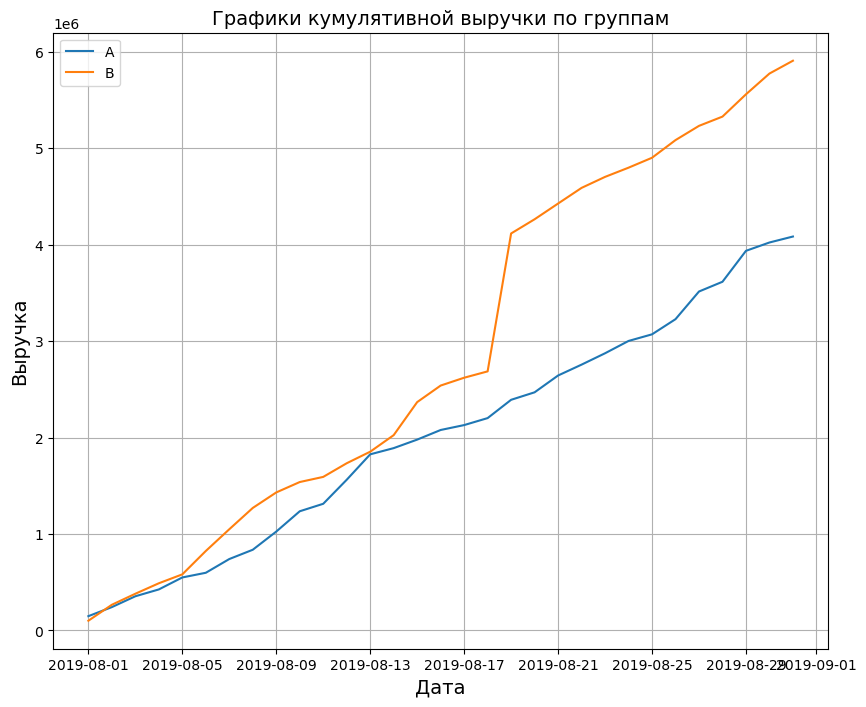

In [24]:
# задаём размер для графиков
plt.figure(figsize=(10, 8))

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenueA = cumulative_data[cumulative_data['group']=='A'][['date', 'revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenueB = cumulative_data[cumulative_data['group']=='B'][['date', 'revenue', 'orders']]

# строим график выручки группы А
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue'], label='B')

plt.grid(visible=True)
plt.title('Графики кумулятивной выручки по группам', fontsize=14)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Выручка', fontsize=14)
plt.legend()
plt.show()

Вывод: Выручка почти равномерно увеличивается в течение всего теста. Однако график выручки группы B имеет резкий рост в определенной точке. Возможно дело в аномальном количестве заказов или же заказ один, но аномально дорогой. 

### График кумулятивного среднего чека по группам

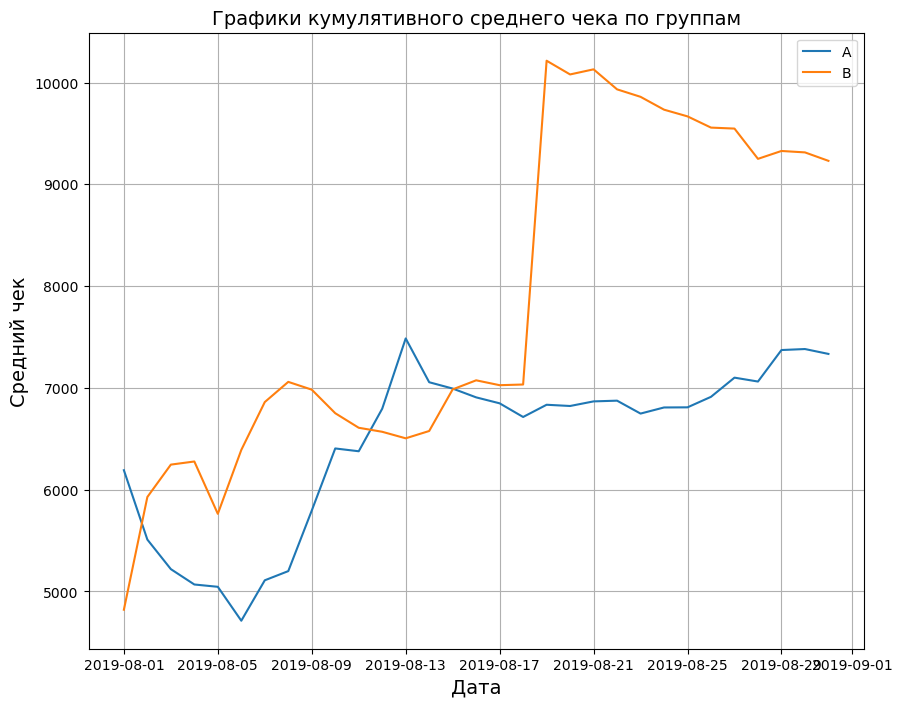

In [25]:
# задаём размер для графиков
plt.figure(figsize=(10, 8))
#аналогично предыдущему пункту выплдним построение графика с данными о среднем чеке по группам
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue']/cumulative_revenueA['orders'], label='A')
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue']/cumulative_revenueB['orders'], label='B')
plt.legend()

plt.grid(visible=True)
plt.title('Графики кумулятивного среднего чека по группам', fontsize=14)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Средний чек', fontsize=14)
plt.legend() 
plt.show()

Вывод: Средний чек в группе A снижается в начале, далее интенсивный рост и стабилизация ориентировочно после 17 августа. Средний чек в группе B имеет некоторую тенденцию к росту, затем сильный скачок в районе 17-21 августа и дальше тренд на снижение.

### График относительного изменения кумулятивного среднего чека группы B к группе A

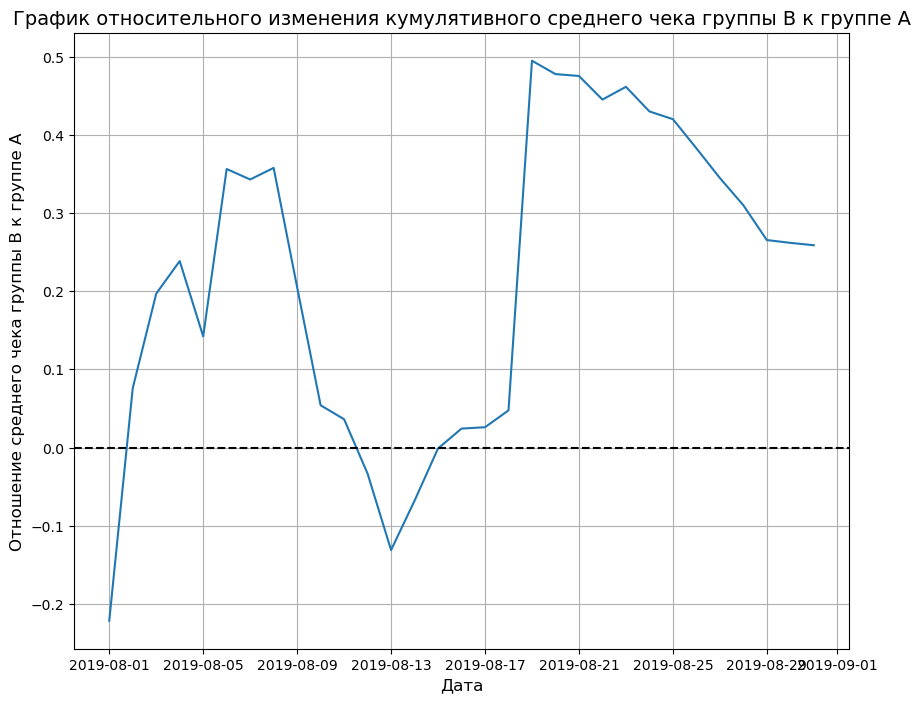

In [26]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenueA.merge(cumulative_revenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(10, 8))
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)
plt.grid(visible=True)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение среднего чека группы B к группе A', fontsize=12)
plt.axhline(y=0.0, color='black', linestyle='--');

Вывод: Данный график подтверждает выводы, сделанные выше, о наличии аномально крупных заказов в группе B.

### График кумулятивного среднего количества заказов на посетителя по группам

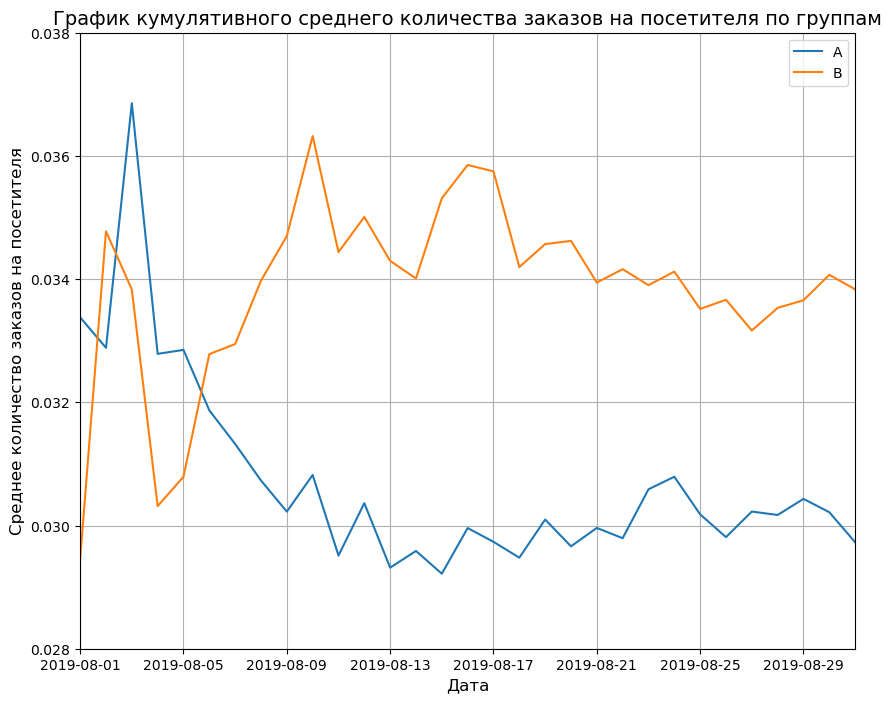

In [27]:
# считаем кумулятивное среднее количество закзазов
cumulative_data['avg_orders'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# задаём размер для графиков
plt.figure(figsize=(10, 8))

# строим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['avg_orders'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['avg_orders'], label='B')

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05]) 

plt.grid(visible=True)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам', fontsize=14)
plt.ylim(0.028, 0.038)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Среднее количество заказов на посетителя', fontsize=12)
plt.legend()
plt.show()

Вывод: В начале видны сильные скачки среднего количества заказов на посетителя в обеих группах, после 13 августа тоже заметны колебания, но незначительные, можно сказать, что значения стабилизируются. Данные в группе B показывают более хороший результат.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

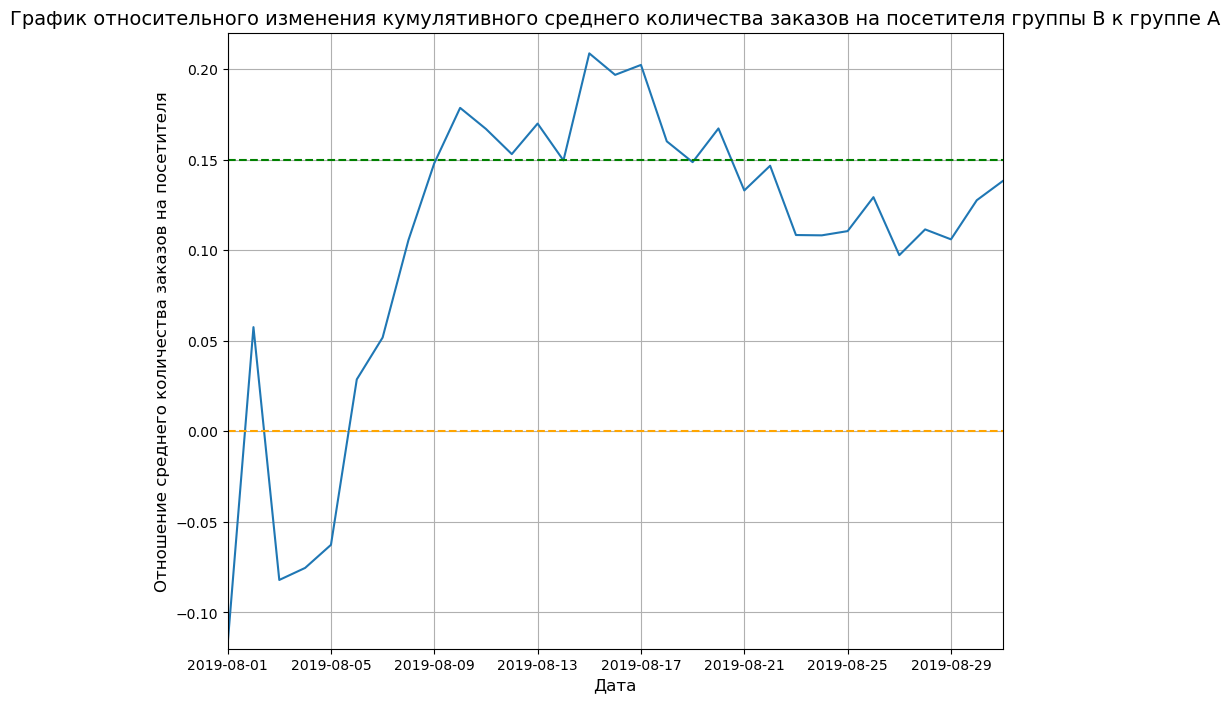

In [28]:
merged_cumulative_avg_orders = cumulative_data_a[['date','avg_orders']].merge(
    cumulative_data_b[['date','avg_orders']],
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'])

# задаём размер для графика
plt.figure(figsize=(10, 8))

# cтроим отношение конверсий
plt.plot(merged_cumulative_avg_orders['date'],
         merged_cumulative_avg_orders['avg_ordersB']/
         merged_cumulative_avg_orders['avg_ordersA']-1)

# добавляем оси X
plt.axhline(y=0, color='orange', linestyle='--')
plt.axhline(y=0.15, color='green', linestyle='--')

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.12, 0.22])

plt.grid(visible=True)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение среднего количества заказов на посетителя', fontsize=12)
plt.show()

Вывод: Начиная с 5 августа группа B лидирует по среднему количеству заказов на пользователя. Наблюдается прирост в 15% относительно группы А, однако после 17 августа начинает снижаться.

### Точечный график количества заказов по пользователям

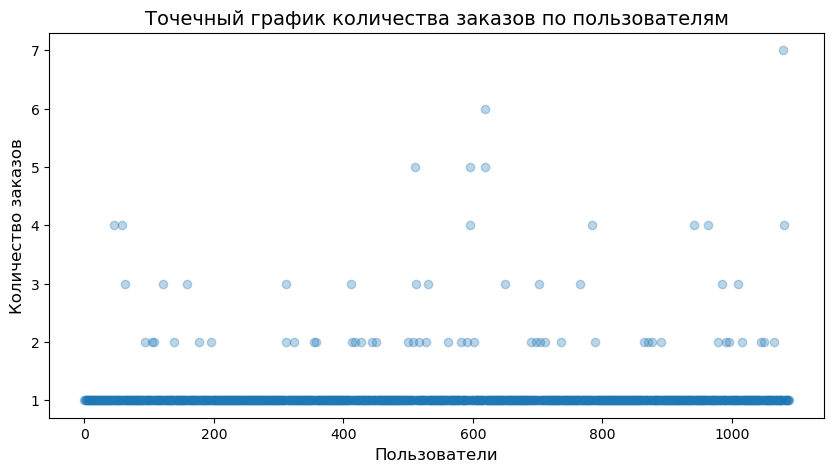

In [29]:
orders_by_users = orders.groupby(['visitor_id', 'group'], as_index=False).agg({'transaction_id': 'nunique'})

orders_by_users.columns = ['visitor_id','group','orders']

x_values = pd.Series(range(0,len(orders_by_users)))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders_by_users['orders'], alpha=0.3)
plt.xlabel('Пользователи', fontsize=12)
plt.title('Точечный график количества заказов по пользователям', fontsize=14)
plt.ylabel('Количество заказов', fontsize=12)
plt.show()


Вывод: Наибольшее количество пользователей делают 1 заказ, гораздо меньшее количество делают 2 заказа. Более 3 заказов большая редкость, но считать ли их выбросами посмотрим далее.

### Расчет 95-ого и 99-ого перцентилей количества заказов на пользователя

In [30]:
orders_by_users.sort_values(by='orders', ascending=False).head(10)

np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

Вывод: 4 и более заказов совершало 1 % пользователей, более 2 заказов совершали 5% пользоваетелей. Для следующего этапа расчета за аномальных пользователей примем тех, кто совершил более 2 заказов.

### Точечный график стоимостей заказов

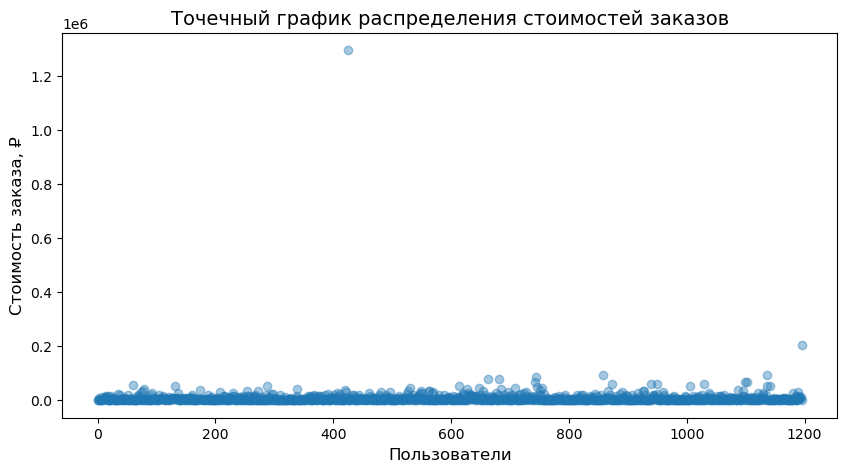

In [31]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders['revenue'], alpha=0.4)
plt.title('Точечный график распределения стоимостей заказов', fontsize=14)
plt.ylabel('Стоимость заказа, ₽', fontsize=12)
plt.xlabel('Пользователи', fontsize=12)
plt.show()

Вывод: На графике сразу бросается в глаза аномальный выброс стоимости заказа. Построим второй график без него для лучшей наглядности распределения

In [32]:
orders_new = orders.query('revenue < 40000')

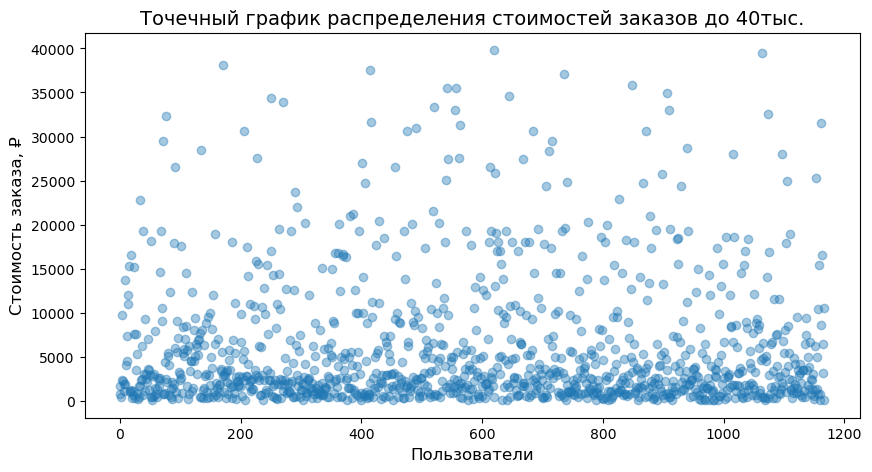

In [33]:
x_values = pd.Series(range(0,len(orders_new['revenue'])))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders_new['revenue'], alpha=0.4)
plt.title('Точечный график распределения стоимостей заказов до 40тыс.', fontsize=14)
plt.ylabel('Стоимость заказа, ₽', fontsize=12)
plt.xlabel('Пользователи', fontsize=12)
plt.show()

Вывод: В основном стоимость заказов находится в диапазоне до 20тыс.руб. Более крупные заказы делают реже.

### Расчет 95-ого и 99-ого перцентилей стоимости заказов

In [34]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Вывод: Стоимость заказа 28тыс.руб. и выше имеют 5% заказов, стоимость заказа в районе 58тыс.руб. - не более 1%. Для следующего этапа расчета за аномальных пользователей примем тех, кто совершил заказ более чем на 28 тыс.руб.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Для расчета статистической значимости сформулируем нулевую и альтернативную гипотезы:

H_0 - различий в среднем количестве заказов на посетителя между группами нет,

H_a - различия в среднем количестве заказов на посетителя между группами есть.

Для проверки гипотез будем применять непараметрический тест Уилкоксона-Манна-Уитни. Его применение обосновано наличием в данных аномально выскоих значений - выбросов, а также тем, что эти данные распределены ненормально: могут быть крупные покупки или множество заказов.

In [35]:
ordersA = orders.query('group == "A"').reset_index(drop=True)
ordersB = orders.query('group == "B"').reset_index(drop=True)
orders_by_usersA = orders_by_users.query('group == "A"').reset_index(drop=True)
orders_by_usersB = orders_by_users.query('group == "B"').reset_index(drop=True)

In [36]:
sampleA = pd.concat([orders_by_usersA['orders'],
                     pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(orders_by_usersA['orders'])),
                               name='orders')],axis=0)

sampleB = pd.concat([orders_by_usersB['orders'],
                     pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(orders_by_usersB['orders'])),
                               name='orders')],axis=0)

In [37]:
print('p_value = ', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительное различие в среднем количестве заказов на посетителя между группами по «сырым» данным', "{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p_value =  0.017
Относительное различие в среднем количестве заказов на посетителя между группами по «сырым» данным 0.138


Вывод: p-value меньше 0,05, поэтому нулевую гипотезу отвергаем. Анализ "сырых" данных показывает, что в среднем количестве заказов на посетителя между группами есть статистически значимые различия

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

In [38]:
print('p_value = ', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы B =', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p_value =  0.729
Относительный прирост среднего чека группы B = 0.259


Вывод: p-value гораздо больше 0,05 - статистически значимых отличий в среднем чеке между группами нет. Относительное различие среднего чека между группами всего 2,6%.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Для расчета статистической значимости сформулируем нулевую и альтернативную гипотезы:

H_0 - различий в среднем чеке между группами нет,

H_a - различия в среднем чеке между группами есть.

In [39]:
users_many_orders = pd.concat(
    [orders_by_usersA[orders_by_usersA['orders'] > np.percentile(orders_by_users['orders'], 95)]['visitor_id'],
    orders_by_usersB[orders_by_usersB['orders'] > np.percentile(orders_by_users['orders'], 95)]['visitor_id']],
    axis=0)

users_expensive_orders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitor_id']
abnormal_users = (pd.concat([users_many_orders, users_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values())


Посчитаем абсолютные и относительные потери пользователей. 

In [40]:
absolute_loss = abnormal_users.nunique()
absolute_loss

74

In [41]:
relative_loss = abnormal_users.nunique() * 100 / orders['visitor_id'].nunique()
relative_loss

7.177497575169738

Абсолютные потери составляют 74 пользователя, относительные потери составили 7%, что является приемлемым.

In [42]:
sampleA_filtered = pd.concat(
    [orders_by_usersA[np.logical_not(orders_by_usersA['visitor_id'].isin(abnormal_users))]['orders'],
        pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(orders_by_usersA['orders'])),
            name='orders')],axis=0)

sampleB_filtered = pd.concat(
    [orders_by_usersB[np.logical_not(orders_by_usersB['visitor_id'].isin(abnormal_users))]['orders'],
        pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(orders_by_usersB['orders'])),
            name='orders',),],axis=0)

print('p_value = ', '{0:.3f}'.format(stats.mannwhitneyu(sampleA_filtered, sampleB_filtered)[1]))
print('Относительное различие в среднем количестве заказов между группами по «очищенным» данным:', '{0:.3f}'.format(sampleB_filtered.mean()/sampleA_filtered.mean()-1))

p_value =  0.013
Относительное различие в среднем количестве заказов между группами по «очищенным» данным: 0.173


Вывод: Результаты по "очищенным" данным почти не отличаются от результатов по "сырым" данным: p-value также меньше, чем 0,05, а относительное различие в среднем количестве заказов на посетителя между группами показывает, что сегмент B лучше, чем сегмент А.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. 

In [43]:
print('p_value = ', '{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]['revenue'],
            orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitor_id']
           .isin(abnormal_users)),)]['revenue'],)[1]))

print('Относительное различие в среднем чеке между группами по «очищенным» данным:', '{0:.3f}'.format(
    orders[np.logical_and(orders['group'] == 'B',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'].mean() - 1))

p_value =  0.738
Относительное различие в среднем чеке между группами по «очищенным» данным: -0.020


Вывод:  p-value больше 0,05, что означет что в среднем чеке по «очищенным» данным различий нет. Но относительное различие в среднем чеке между группами по «очищенным» данным отрицательное, то есть средний чек группы А больше среднего чека группы В. Значит аномлаьно высокий чек в группе В существенно улучшал показатели данной группы.

### Решение по результатам теста

Вывод: По результатам проведенного A/B теста, считаю, что можно завершить тест и зафиксировать,что группа В показала себя лучше относительно группы А. Относительное преимущество в количестве заказов на посетителя группы B над группой A составляет 13,8 % по "сырым" данным и 17,4% по "очищенным". Как по сырым, так и по очищенным данным нет статистически значимого различия по среднему чеку на посетителя между группами.

## Вывод:

В ходе проекта было необходимо провести предобработку имеющихся данных, приоритизировать гипотезы по увеличению выручки, запустить A/B-тест и проанализировать результаты.

Оценивая совокупность данных методов ICE и RICE наиболее перспективными являются такие гипотезы: 0 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

По результатам A/B теста было принято решение завершить тест и признать победу группы B.
